# EDA del Dataset de Airbnb NYC

En este notebook realizamos un an√°lisis exploratorio sobre los datos limpios de Airbnb en Nueva York. El objetivo es:

- Comprender la calidad de los datos (nulos, duplicados, outliers)
- Explorar tendencias por barrio, tipo de habitaci√≥n, y precio
- Generar visualizaciones para el dashboard final en Power BI

El dataset fue limpiado previamente en el notebook `airbnb_etl.ipynb` y se encuentra en `Output/airbnb_clean.csv`.


In [1]:
# Carga del dataset limpio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Output/airbnb_clean.csv")
df.head()



id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  availability_365  
0    149               1                  9               365  
1    225               1                 45               355  
2    150               3                  0               365  
3     89               1                270               194  
4     80              10                  9                 0

An√°lisis de valores nulos

In [2]:
df.isnull().sum()


id                      0
name                   16
host_id                 0
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
availability_365        0
dtype: int64

Procedemos a eliminar los valores nulos que est√°n en name, ya que name representa, en este caso el t√≠tulo del anuncio, por ejemplo "Beautiful room in Manhattan" y no incide en nuestro an√°lisis.

In [5]:
df.isnull().sum()

id                     0
name                   0
host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
dtype: int64

An√°lisis de duplicados


In [6]:
# Eliminamos los valores nulos

duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")



Registros duplicados: 0


In [5]:
# Limpieza de los datos

# Filtramos las columnas de inter√©s
cols = [
    'id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
    'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
    'number_of_reviews', 'availability_365'
]
df = df[cols]

# Eliminamos duplicados
df = df.drop_duplicates()

# Eliminamos precios sospechosos
df = df[(df['price'] > 0) & (df['price'] < 1000)]

df.to_csv("../Output/airbnb_clean.csv", index=False)
df.shape


(48586, 12)

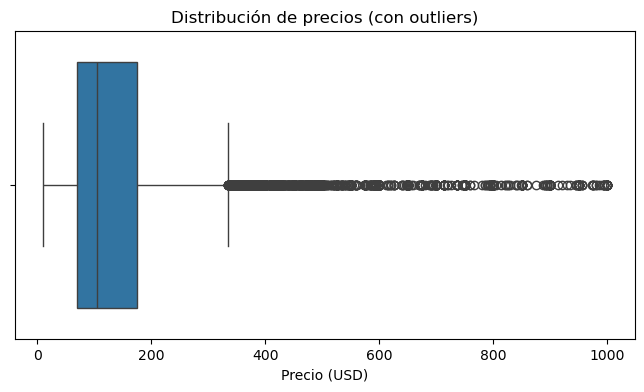

In [7]:
# Analizamos los outliers en price y minimum_nights
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title("Distribuci√≥n de precios (con outliers)")
plt.xlabel("Precio (USD)")
plt.show()


El boxplot muestra la distribuci√≥n de precios de las propiedades de Airbnb.

- La mayor√≠a de los anuncios tienen un precio entre **$50 y $200 USD**.
- El precio mediano (l√≠nea negra central) est√° alrededor de **$100 USD**.
- Se observan numerosos valores at√≠picos (outliers) a partir de los **$300 USD**, extendi√©ndose hasta el l√≠mite superior filtrado de $1000 USD.
- Estos outliers son propiedades premium o casos excepcionales, y aunque no representan a la mayor√≠a, pueden ser v√°lidos seg√∫n la ubicaci√≥n y tipo de alojamiento.

üìå **Decisi√≥n**: No se eliminar√°n estos outliers ya que pueden aportar valor al an√°lisis posterior (por ejemplo, en barrios exclusivos como Manhattan).

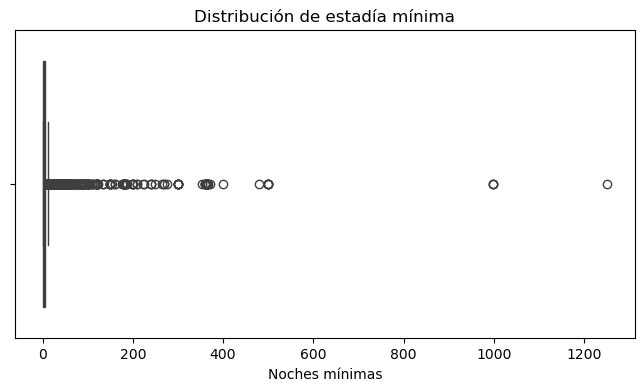

In [8]:
# Outliers en minimum_nights
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["minimum_nights"])
plt.title("Distribuci√≥n de estad√≠a m√≠nima")
plt.xlabel("Noches m√≠nimas")
plt.show()


El boxplot de la variable `minimum_nights` revela lo siguiente:

- La mayor√≠a de los alojamientos requieren entre **1 y 10 noches m√≠nimas**, lo cual es consistente con estancias t√≠picas de turismo.
- Existen **valores at√≠picos extremos** que superan ampliamente los **300, 500 e incluso 1000 noches**, lo cual representa m√°s de **2 o 3 a√±os consecutivos**, un comportamiento completamente an√≥malo para este contexto.
- Estos valores probablemente se deban a:
  - Errores de carga por parte de los anfitriones
  - Alojamientos usados para alquileres a largo plazo (no tur√≠sticos)
  - Casos que no aportan al objetivo de este an√°lisis

üìå **Decisi√≥n**: Para mantener el foco en reservas tur√≠sticas, se eliminar√°n los anuncios con m√°s de **30 noches m√≠nimas**.


In [11]:
# Procedemos a eliminar los anuncios con m√°s de 30 noches m√≠nimas
df = df[df['minimum_nights'] <= 30]

Precio promedio por grupo de barrio

Utilizaremos la variable **neighbourhood_group** para  agrupar los principales distritos de NYC: Manhattan, Brooklyn, Queens, Bronx y Staten Island.

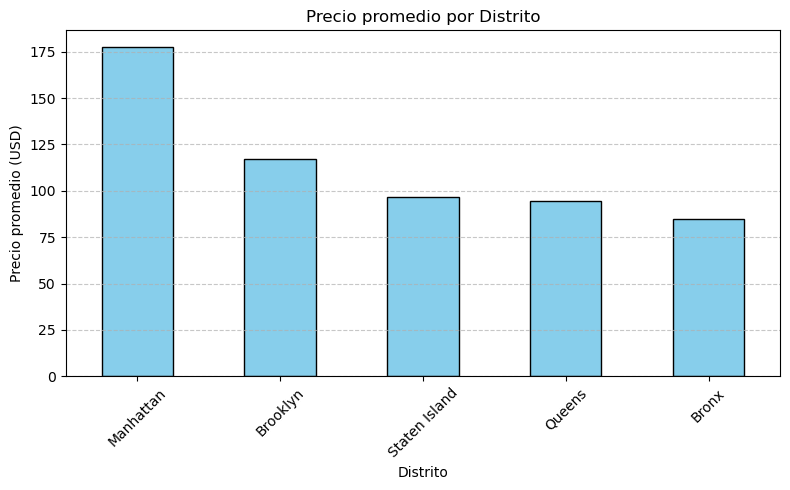

In [13]:
df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False).plot(
    kind="bar", figsize=(8, 5), color="skyblue", edgecolor="black"
)
plt.title("Precio promedio por Distrito")
plt.ylabel("Precio promedio (USD)")
plt.xlabel("Distrito")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


El gr√°fico de barras muestra el precio promedio de los alojamientos por distrito de la ciudad de Nueva York:

- **Manhattan** presenta el precio promedio m√°s alto, superando los **$175 USD** por noche. Esto se debe a su alta demanda tur√≠stica, su centralidad y la oferta premium.
- **Brooklyn** le sigue con un promedio superior a los **$115 USD**, probablemente influenciado por su cercan√≠a a Manhattan y su creciente atractivo como zona alternativa y cultural.
- **Staten Island**, **Queens** y **Bronx** tienen precios promedio m√°s bajos, cercanos o por debajo de los **$100 USD**. Estas zonas son m√°s residenciales y alejadas del centro tur√≠stico.

üìå Este an√°lisis muestra c√≥mo la ubicaci√≥n geogr√°fica impacta directamente en el precio del alojamiento en Airbnb. Sirve como base para segmentar mercados y tomar decisiones de negocio o visualizaci√≥n en Power BI.

Distribuci√≥n de los departamentos

Utilizaremos la variable **room_type** que nos indicar√° si el alojamiento es un departamento completo, una habitaci√≥n privada o compartida, etc.

C:\Users\octav\AppData\Local\Temp\ipykernel_15980\1638179502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="room_type", order=df["room_type"].value_counts().index, palette="pastel", edgecolor="black")


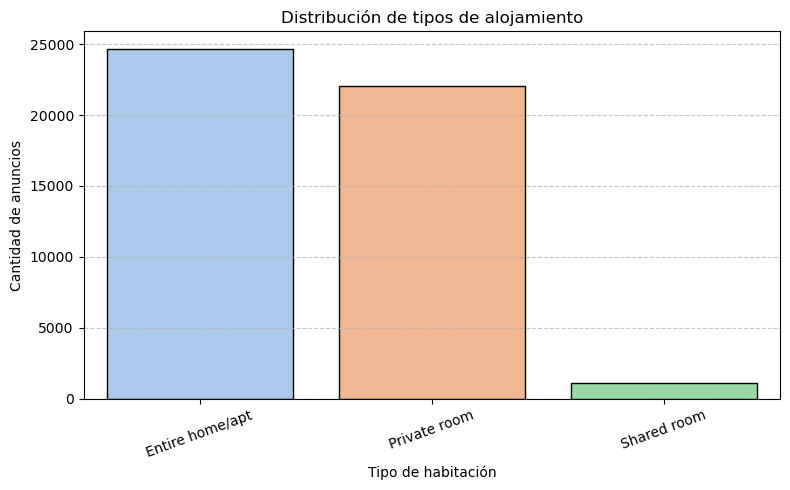

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="room_type", order=df["room_type"].value_counts().index, palette="pastel", edgecolor="black")
plt.title("Distribuci√≥n de tipos de alojamiento")
plt.xlabel("Tipo de habitaci√≥n")
plt.ylabel("Cantidad de anuncios")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


El gr√°fico de barras muestra c√≥mo se distribuyen los tipos de habitaci√≥n ofrecidos en Airbnb NYC:

- **Entire home/apt** (departamento completo) es el tipo m√°s com√∫n, con casi **25.000 anuncios**. Esto indica una alta oferta de propiedades completas, ideales para familias o grupos.
- **Private room** (habitaci√≥n privada) tambi√©n es muy frecuente, con m√°s de **22.000 anuncios**. Este tipo es usual entre anfitriones que comparten su vivienda.
- **Shared room** (habitaci√≥n compartida) representa un porcentaje muy bajo del total, lo que refleja una **baja demanda o menor atractivo** para este tipo de alojamiento en NYC.

üìå Esta variable es clave para an√°lisis de segmentaci√≥n y para entender c√≥mo se reparte la oferta seg√∫n el tipo de experiencia que busca el hu√©sped.


Distribuci√≥n Geogr√°fica de los alojamientos en NY

Ahora analizamos la distribuci√≥n geogr√°fica de los alojamientos en Nueva York a trav√©s de un mapa de puntos y utilizando las columnas **latitude**, **longitude** y **neighbourhood_group**

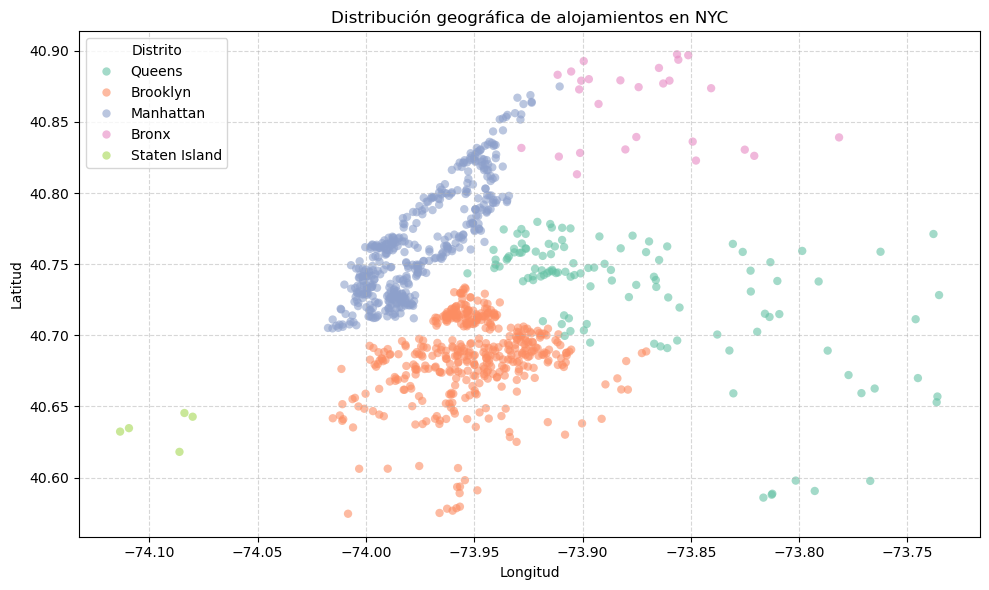

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Muestra de 1000 registros para que el gr√°fico sea m√°s liviano
df_sample = df.sample(1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_sample,
    x="longitude",
    y="latitude",
    hue="neighbourhood_group",
    palette="Set2",
    alpha=0.6,
    edgecolor="none"
)
plt.title("Distribuci√≥n geogr√°fica de alojamientos en NYC")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Distrito")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


El gr√°fico de dispersi√≥n permite observar la ubicaci√≥n geogr√°fica de los alojamientos de Airbnb, coloreados seg√∫n el distrito (`neighbourhood_group`). 

**Observaciones clave:**

- **Manhattan** (azul oscuro) concentra la mayor densidad de anuncios, especialmente alineados en el eje vertical, lo cual refleja la forma alargada de la isla. Esto coincide con la alta demanda y presencia tur√≠stica.
- **Brooklyn** (naranja) tiene una gran presencia en la zona sur del mapa, mostrando una amplia distribuci√≥n, aunque menos densa que Manhattan.
- **Queens** (verde), **Bronx** (rosa) y **Staten Island** (verde claro) presentan menor densidad, con anuncios m√°s dispersos.
- El mapa evidencia una clara correlaci√≥n entre las zonas m√°s tur√≠sticas y la densidad de oferta en Airbnb.

üìå Esta visualizaci√≥n es fundamental para entender c√≥mo se distribuyen espacialmente los alojamientos, y sirve como base para an√°lisis m√°s complejos como segmentaci√≥n geogr√°fica, detecci√≥n de hotspots o predicci√≥n de precios por zona.


# ‚úÖ Conclusiones del An√°lisis Exploratorio de Datos (EDA)

A lo largo de este notebook realizamos una exploraci√≥n detallada del dataset de Airbnb en Nueva York. A continuaci√≥n, se resumen los principales hallazgos:

### üìå Calidad de los datos
- Se detectaron **16 valores nulos** en la columna `name`, los cuales fueron eliminados.
- No se encontraron **registros duplicados**.
- Se filtraron **outliers en `price`** (menores a 10 USD) y **`minimum_nights`** (mayores a 30), lo que mejor√≥ la calidad anal√≠tica del dataset.

### üìä An√°lisis de variables clave
- **Precio promedio**: Manhattan presenta los precios m√°s altos (>175 USD), seguido por Brooklyn. Staten Island y Bronx son los m√°s econ√≥micos.
- **Tipo de habitaci√≥n**: La mayor√≠a de los alojamientos son departamentos completos o habitaciones privadas. Las habitaciones compartidas son poco frecuentes.
- **Distribuci√≥n geogr√°fica**: Manhattan y Brooklyn concentran la mayor cantidad de alojamientos. Queens, Bronx y Staten Island presentan menor densidad.

### üìç Valor agregado
Este an√°lisis sienta las bases para:
- Crear dashboards interactivos en Power BI
- Desarrollar modelos predictivos (por ejemplo, precio seg√∫n zona y tipo)
- Tomar decisiones de inversi√≥n o estrategia en plataformas como Airbnb

---

‚úÖ El dataset limpio y enriquecido est√° listo para su uso en visualizaci√≥n o machine learning.
